 # <div align="center"> <span style="font-size:larger; font-weight:bold;" >SCORE PREDICTION USING SIMPLE LINEAR REGRESSION
</span></div>  

## PROBLEM STATEMENT:
    In this regression task, I will have to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.   
    
## DATASET GIVEN:
    A sample data with the two variables, one is hours and other is scores for the hours a student studied

In [1]:
# Importing the necessary libraries in order to process the data
import numpy as np
import pandas as pd


# Importing libraries to include the visualizations in the Nb
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the warnings, to ignore any unnecessary warning pops up
import warnings
warnings.filterwarnings("ignore")

# Creating a DF to show the version of the modules used here
version = [['Numpy',np.__version__],['Pandas',pd.__version__],['Matplotlib',mpl.__version__],['Seaborn',sns.__version__]]
pack = pd.DataFrame(version,columns=['Package Name','Version'],index=[1,2,3,4])


print("Packages are Imported with the version as follows:")
print("=="*40)
pack

Packages are Imported with the version as follows:


,Package Name,Version
1,Numpy,1.18.1
2,Pandas,1.0.5
3,Matplotlib,3.3.0
4,Seaborn,0.10.0


__Data Loading and check:__

Now the packages are imported in to Nb, we will load and do some kind of EDA on the same


In [2]:
# Loading the dataset from the given url into Nb

scores_df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv",header=0)

In [3]:
# Checking the glimpse of the data loaded

scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


__Data Dimension and Data Type Check:__

Once we are done with the above step, we are going to check the dimensions of the data loaded

In [4]:
# Dimension check

print("This DF has {0} rows and {1} columns in it".format(scores_df.shape[0],scores_df.shape[1]))

This DF has 25 rows and 2 columns in it


In [5]:
# Data types and missing values check

scores_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As expected, scores are in integer format and hours are in floating format

__Statistical Analysis:__

We are yet to find the outliers available in the DF, if any. It can be done by using the describe function with distinct parameters it has

In [6]:
# Statistical figures for the DF loaded

scores_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
90%,8.420000,85.600000
95%,8.820000,87.600000
99%,9.128000,93.320000


As far as the above description, we could that there are outliers seen in the dataset, but since it is valid to have the outliers and make sense we are not handling the same.  
As a part of outlier detection, we are going to see the boxplots also

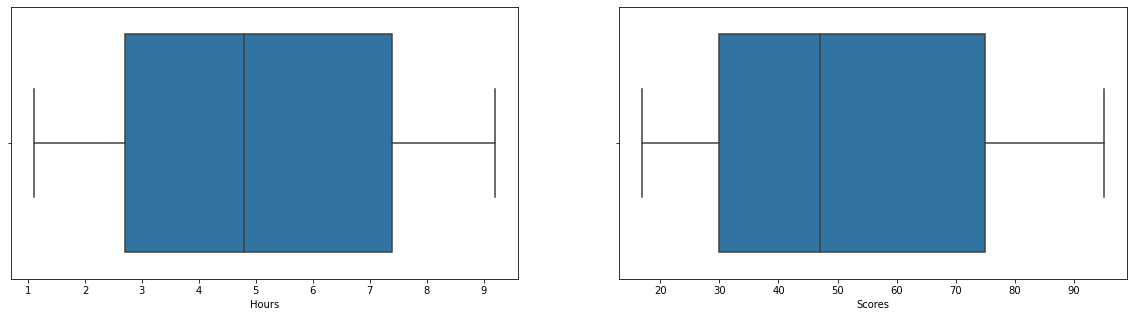

In [7]:
# Plotting both of the variables in a subplot

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'Hours', data = scores_df)
plt.subplot(1,2,2)
sns.boxplot(x = 'Scores', data = scores_df)
plt.show()

___Inferences from the above plot:___

1. Hours column has the IQR as 4.9 hours and the fences are from 1 to 9 with upper,lower limits 2.8 and 7.5 respectively 
2. Scores columns has the IQR as 48 hours and the fences are from 10 to 95 with upper,lower limits 30 and 75 respectively 

### Exploratory Data Analysis

Lets understand the data more by plotting them against different graphs

___Univariate Analysis:___

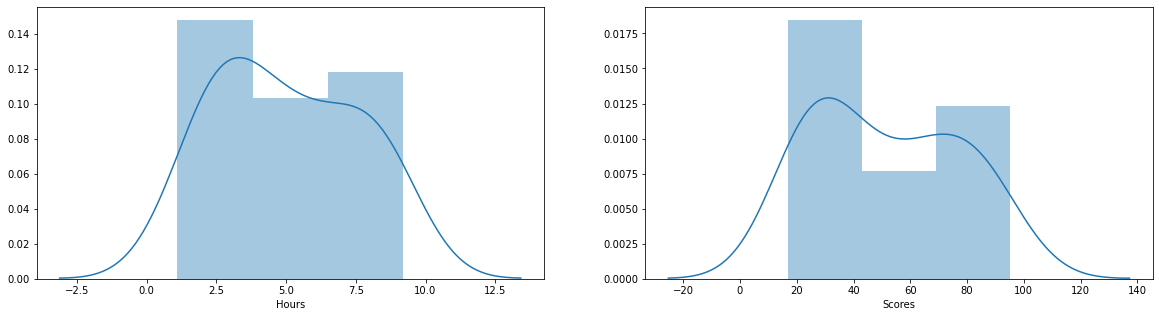

In [8]:
# Lets see the distribution using distplot


plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.distplot(scores_df['Hours'])
plt.subplot(1,2,2)
sns.distplot(scores_df['Scores'])
plt.show()

___Inferences from the above plot:___

1. Hours column has the distribution of left skewed data as it lean towards 2.5 hours range respectively 
2. Scores columns has also the distribution of left skewed data as it lean towards 30 Scores range respectively 

___Bi-Variate Analysis:___

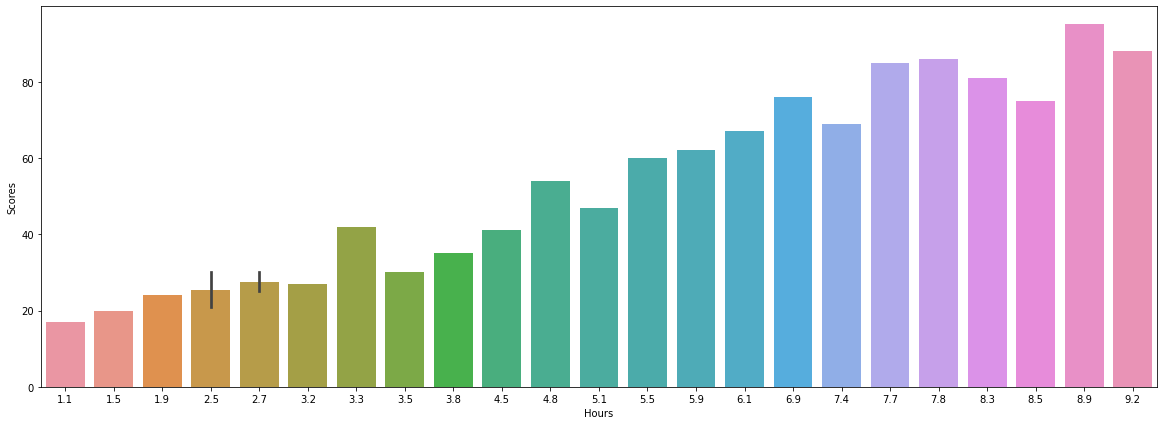

In [9]:
# Lets understand how the data spread across

plt.figure(figsize=(20,7))
sns.barplot(x=scores_df.Hours,y=scores_df.Scores,)
plt.show()

___Inferences from the above plot:___

*  Hours value has the continuous increase till 2.7 with the increasing score and then drops. Again it picks up and give overall good proportional values of scores respectively 
 

___Multi-Variate Analysis:___

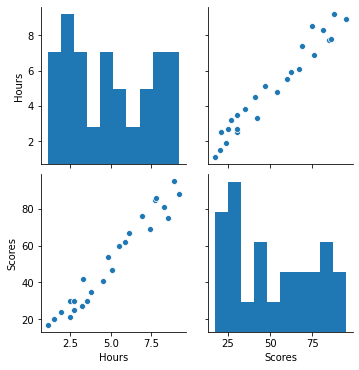

In [10]:
# Lets see the pairplot of the DF

sns.pairplot(scores_df)
plt.show()

___Inferences from the above plot:___

*  Hours value has the continuous increase increasing score and seen some hindrances then and there. Again it picks up and give overall good proportional values of scores respectively 

___HeatMap:___

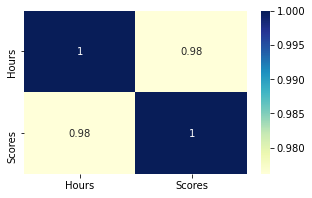

In [11]:
# Lets see the correlation using Heatmap

plt.figure(figsize = (5,3))
sns.heatmap(scores_df.corr(),annot=True,cmap='YlGnBu')
plt.show()

___Inferences from the above plot:___

*  Hours value has highly positively correlated with Scores value and it can be neglected as we have the Multicollinearity takes place here respectively 

___Data Preparation:___
We are going to divide the data into ___attributes(inputs)___ and ___labels(outputs)___.

In [12]:
# Separating the values in to X and y accordingly

X = scores_df.iloc[:, :-1].values
y = scores_df.iloc[:, 1].values 

In [13]:
# Importing the train_test_split from the module

from sklearn.model_selection import train_test_split

# Adding the below line to specify the train_test_split to use always the same set of train and test
# Providing the parameters and splitting the DF respectively
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size = 0.2, random_state=0)

Lets inspect the shapes/dimensions of the separated arrays 

In [14]:
# Shape check of arrays

print("X_train shape of "+str(X_train.shape)+" y_train with shape of "+str(y_train.shape))

X_train shape of (20, 1) y_train with shape of (20,)


__Model Building:__

We will now import the library and build the model with the values provided

In [15]:
# Importing Linear Regression in to Nb and fitting the same

from sklearn.linear_model import LinearRegression  
Linear_regressor = LinearRegression()  
Linear_regressor.fit(X_train, y_train) 

print("Model Training Process completed sucessfully")

Model Training Process completed sucessfully


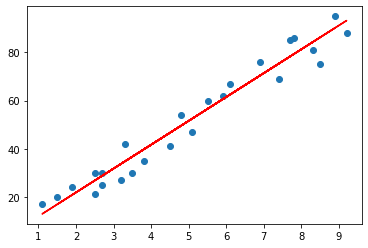

In [16]:
# Plotting the regression line
line = Linear_regressor.coef_*X+Linear_regressor.intercept_

# Plotting for the test data
p = plt.scatter(X, y)
p=plt.plot(X, line,color='red');
plt.show()

From the above trained model, we could identify that the predicted line seems to have a very low cost function and it looks good model

___Model Prediction:___

Lets now predict the probability values from the model

In [17]:
# Predicting the values and storing it in new DF

y_pred = Linear_regressor.predict(X_test)
scores_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
scores_pred 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


___Model Evaluation:___

We are going to evaluate the model with some of the common metrics used to evaluate the Linear models

___R2 Score___:

In [18]:
# Importing the r2_score library
from sklearn.metrics import r2_score

# Calculating the r2_score of test and predicted data
print("R-Squared value of the model built is {0}".format(r2_score(y_test, y_pred)))

R-Squared value of the model built is 0.9454906892105356


In [19]:
# Importing the MSE function and calculating the value

from sklearn.metrics import mean_absolute_error  

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


___Score Prediction:___

In [20]:
# Getting the value of hours to predict from user

import ast
hours = ast.literal_eval(input())

predicted_score = Linear_regressor.predict(np.array(hours).reshape(-1, 1))
print("Hours Entered = {0} and Predicted Score = {1}".format(hours,predicted_score[0]))

9.25
Hours Entered = 9.25 and Predicted Score = 93.69173248737538
